# Importing libraries and data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import json
import re
import csv
from tqdm import tqdm

In [2]:
#printing the netflix dataset
netflix_data=pd.read_csv("netflix.csv")
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
#data types of the columns in the datasets
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
#Shape of the dataset
netflix_data.shape

(8807, 12)

# Data Visualizations

In [5]:
netflix_shows=netflix_data[netflix_data['type']=='Movie']
netflix_movies=netflix_data[netflix_data['type']=='TV Show']

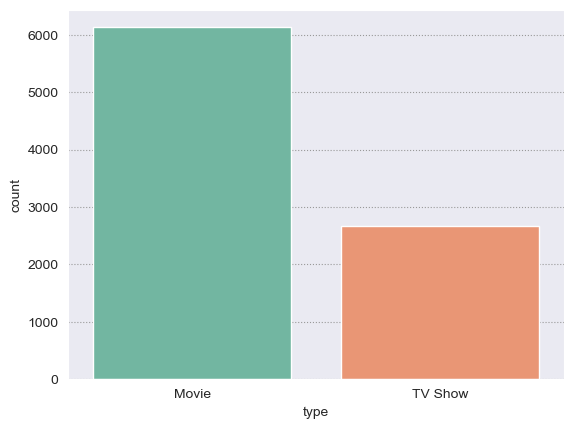

In [6]:
#Movie or TV show
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax = sns.countplot(x="type", data=netflix_data, palette="Set2")

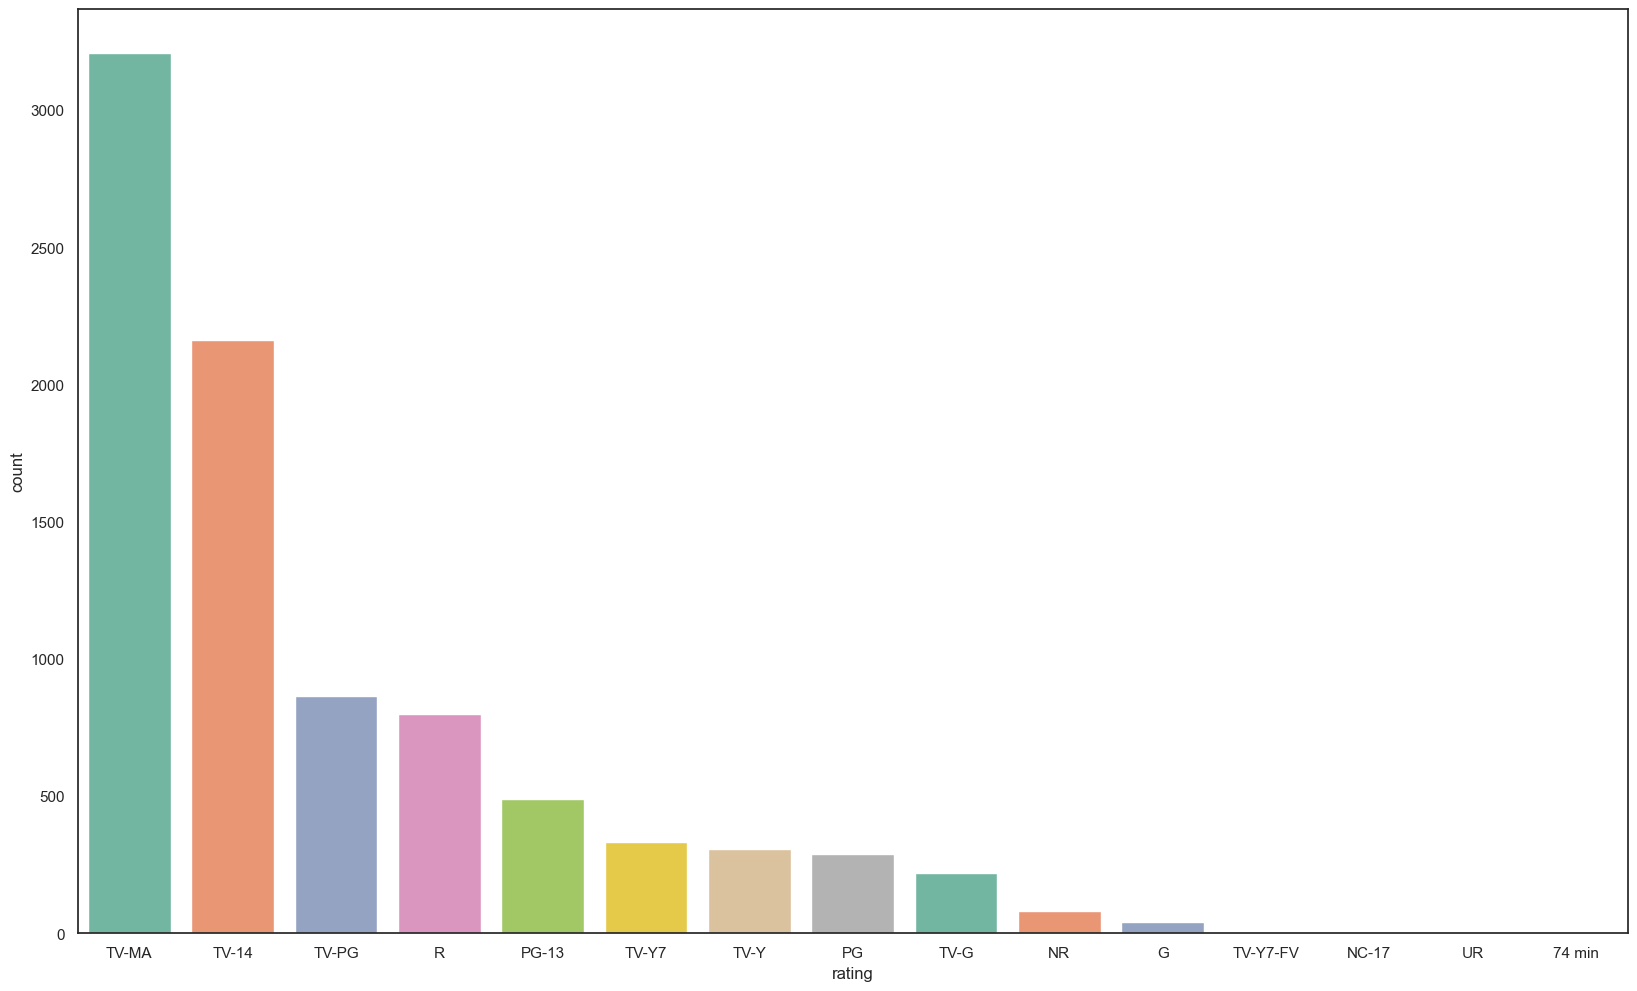

In [7]:
#Rating type
plt.figure(figsize=(20,12))
sns.set(style="white")
ax = sns.countplot(x="rating", data=netflix_data, palette="Set2", order=netflix_data['rating'].value_counts().index[0:15])

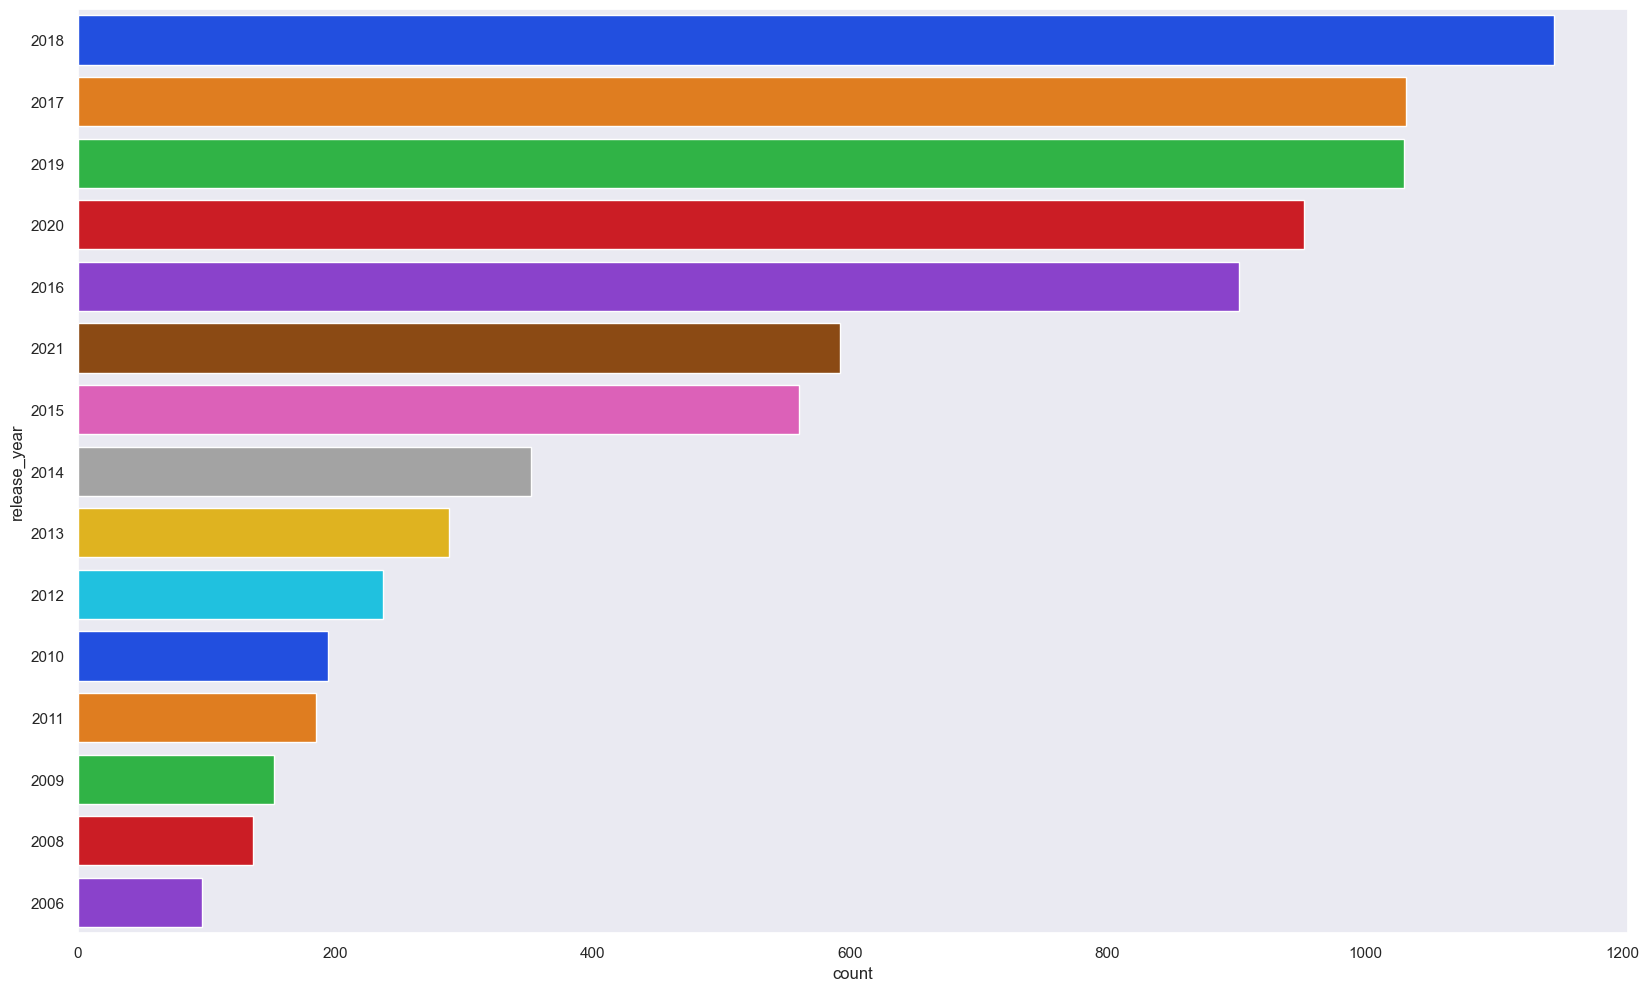

In [8]:
#Year released
plt.figure(figsize=(20,12))
sns.set(style="dark")
ax = sns.countplot(y="release_year", data=netflix_data, palette="bright", order=netflix_data['release_year'].value_counts().index[0:15])

# Recommendation System

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
tfidf = TfidfVectorizer(stop_words='english')
netflix_data['description'] = netflix_data['description'].fillna('')
tfidf_matrix = tfidf.fit_transform(netflix_data['description'])
tfidf_matrix.shape

(8807, 18895)

In [11]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [12]:
indices = pd.Series(netflix_data.index, index=netflix_data['title']).drop_duplicates()

In [13]:
#Defining the recommendation system
def get_recommendations_with_similarity(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]  # Get top 5 similar items
    movie_indices = [i[0] for i in sim_scores]
    
    # Extract the similarity scores for each recommendation
    similarity_scores = [i[1] for i in sim_scores]
    
    # Retrieve the movie details for recommendations
    recommendations = netflix_data[['title', 'description']].iloc[movie_indices]
    
    # Combine the recommendations with their corresponding similarity scores
    recommendations_with_similarity = recommendations.copy()
    recommendations_with_similarity['similarity_score'] = similarity_scores
    
    return recommendations_with_similarity

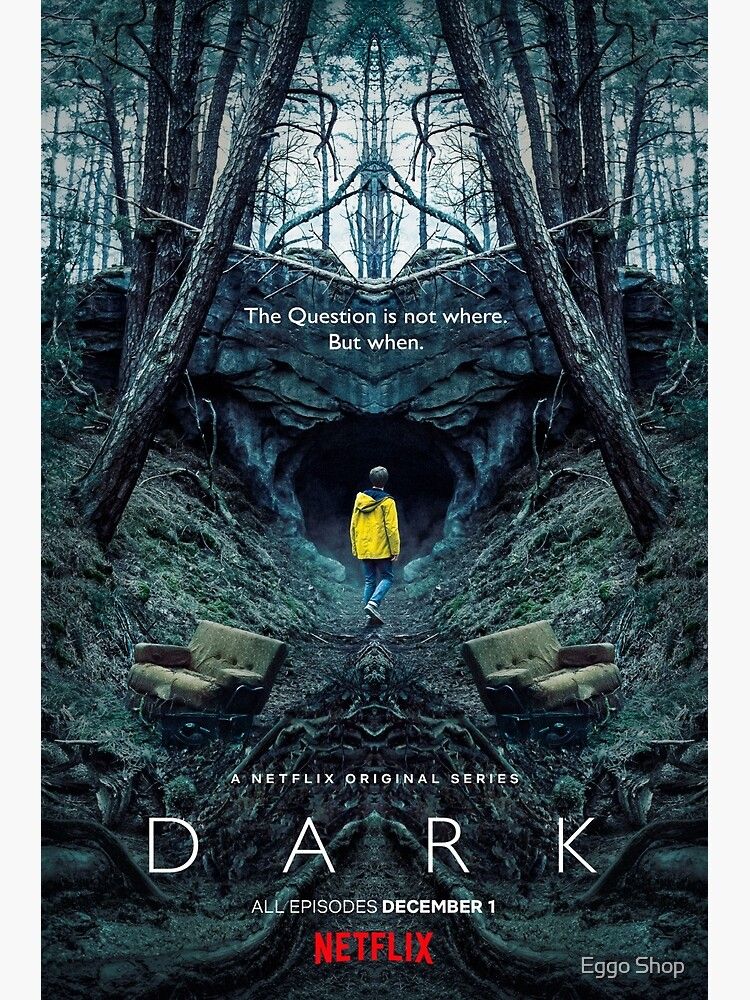

In [14]:
get_recommendations_with_similarity('Dark')

,title,description,similarity_score
2874,Altered Carbon,"After 250 years on ice, a prisoner returns to ...",0.164750
4629,Maniac,Two struggling strangers connect during a mind...,0.154897
1034,Synchronic,Two paramedics begin to question their realiti...,0.153008
626,Sophie: A Murder in West Cork,A shocking murder in rural Ireland sets off an...,0.152803
1117,Ibrahim a Fate to Define,"Raised in a quiet home, Lina searches for answ...",0.151507


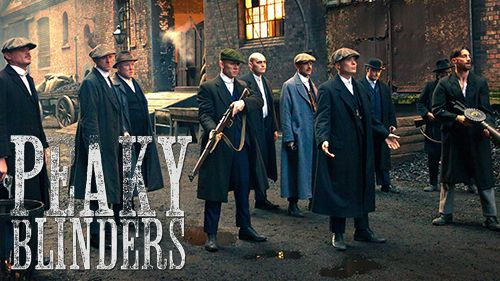

In [15]:
get_recommendations_with_similarity('Peaky Blinders')

,title,description,similarity_score
7683,Our Godfather,"In 1986, Tommaso Buscetta became the first top...",0.134343
2646,My Stupid Boss,"After moving to Kuala Lumpur, Diana lands a se...",0.118622
3133,Don,A ruthless crime boss and drug lord is nabbed ...,0.118377
8293,The Fear,Richie Beckett is an aging Brighton crime boss...,0.118076
7140,Jonathan Strange & Mr Norrell,"In 1806, ambitious magician Norrell leads a re...",0.114055


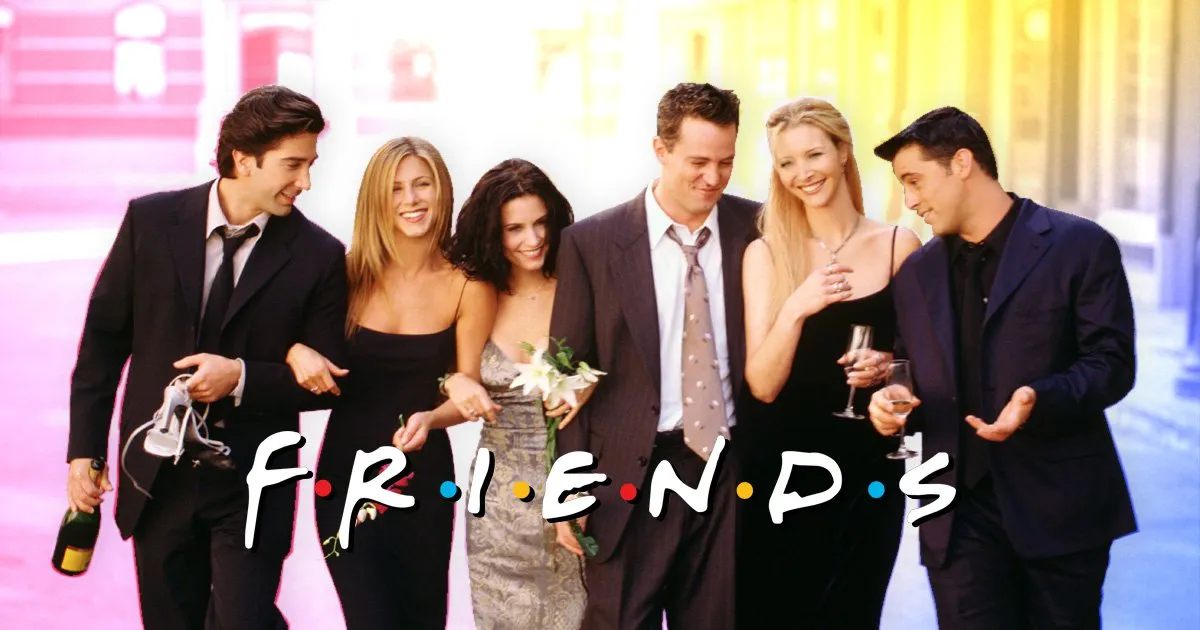

In [16]:
get_recommendations_with_similarity('Friends')

,title,description,similarity_score
7397,Manhattan Romance,A filmmaker working on a documentary about lov...,0.152370
3369,BoJack Horseman,Meet the most beloved sitcom horse of the '90s...,0.150290
964,Things Heard & Seen,A young woman discovers that both her husband ...,0.149493
5090,Episodes,Hoping to create an American version of their ...,0.148537
4096,Studio 54,This documentary follows the rapid rise and fa...,0.142405
